In [1]:
import json
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
N = 6
n_particles1 = np.logspace(1, N, N, dtype=int)
n_quadrupoles1 = 10
n_slices1 = 1
n_particles1

array([     10,     100,    1000,   10000,  100000, 1000000])

In [3]:
memory1 = np.full_like(n_particles1, np.nan, dtype=np.double)
memory1_nograd = memory1.copy()

for i, n_par in enumerate(n_particles1):
    os.system("scalene --memory ./torch_module_profiling.py "
              + str(n_par) + " " + str(n_quadrupoles1) + " " + str(n_slices1))
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            memory1[i] = line['n_peak_mb']
    os.system("scalene --memory ./torch_module_profiling_no_grad.py "
              + str(n_par) + " " + str(n_quadrupoles1) + " " + str(n_slices1))
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling_no_grad.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            memory1_nograd[i] = line['n_peak_mb']

[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument

In [4]:
memory1, memory1_nograd

(array([1.47758961e+00, 1.47765541e+00, 4.43727112e+00, 4.34162626e+01,
        2.83835452e+02, 2.87189190e+03]),
 array([         nan,   0.        ,   0.        ,   1.59945965,
         15.58901501, 248.286479  ]))

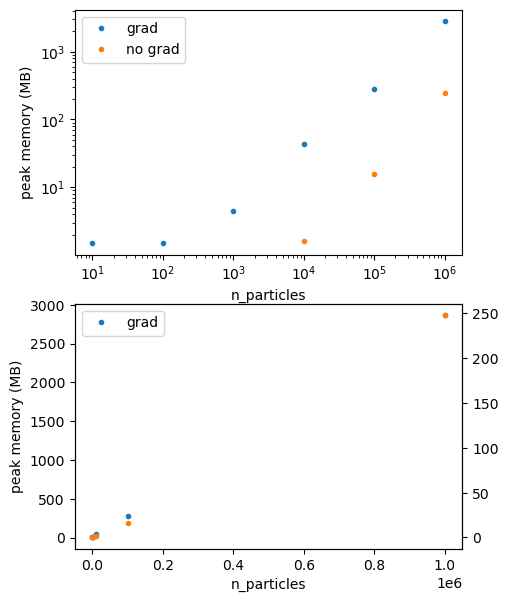

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(5,7))
ax[0].plot(n_particles1, np.array(memory1), '.', label='grad')
ax[0].plot(n_particles1, np.array(memory1_nograd), '.', label='no grad')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('n_particles')
ax[0].set_ylabel('peak memory (MB)')
ax[0].legend()
ax2 = ax[1].twinx()
ax[1].plot(n_particles1, np.array(memory1), '.',color=colors[0], label='grad')
ax2.plot(n_particles1, np.array(memory1_nograd), '.',color=colors[1], label='no grad')
ax[1].set_xlabel('n_particles')
ax[1].set_ylabel('peak memory (MB)')
ax[1].legend()

In [6]:
n_particles2 = 10_000
n_slices2 = 1
n_quadrupoles2 = np.linspace(10, 100, 10, dtype=int)
n_quadrupoles2

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [8]:
memory2 = np.full_like(n_quadrupoles2, np.nan, dtype=np.double)
memory2_nograd = memory2.copy()

for i, n_quads in enumerate(n_quadrupoles2):
    os.system("scalene --memory ./torch_module_profiling.py "
              + str(n_particles2) + " " + str(n_quads) + " " + str(n_slices2) )
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            memory2[i] = line['n_peak_mb']
    os.system("scalene --memory ./torch_module_profiling_no_grad.py "
              + str(n_particles2) + " " + str(n_quads) + " " + str(n_slices2) )
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling_no_grad.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            memory2_nograd[i] = line['n_peak_mb']

[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument


In [9]:
memory2, memory2_nograd

(array([ 43.70534039,  88.35743999, 133.19134235, 178.09479141,
        224.74211407, 268.17608738, 312.89367771, 357.79822636,
        402.54427624, 447.32924175]),
 array([1.59691906, 1.56917572, 4.44197369, 1.4893446 , 1.83924103,
        1.50709057, 1.51433086, 1.52105236, 2.12627029, 1.48085308]))

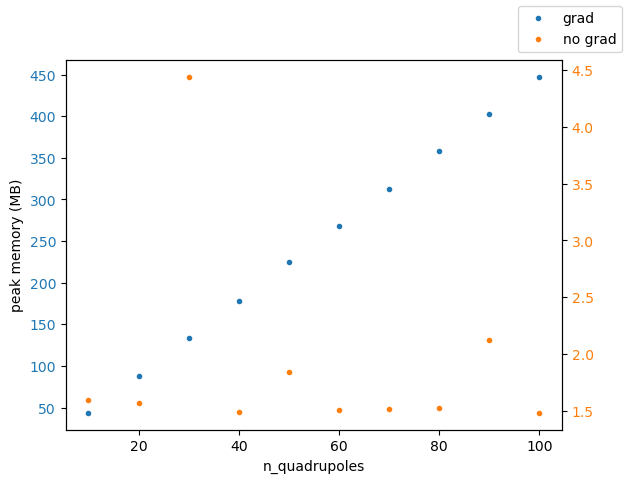

In [10]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(n_quadrupoles2, np.array(memory2), '.', color=colors[0], label='grad')
ax.tick_params(axis="y", labelcolor=colors[0])
ax2.plot(n_quadrupoles2, np.array(memory2_nograd), '.',color=colors[1], label='no grad')
ax2.tick_params(axis="y", labelcolor=colors[1])
ax.set_xlabel('n_quadrupoles')
ax.set_ylabel('peak memory (MB)')
fig.legend()

In [11]:
n_particles3 = 10_000
n_quadrupoles3 = 1
n_slices3 = np.linspace(1,10,10, dtype=int)
n_slices3

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
memory3 = np.full_like(n_slices3, np.nan, dtype=np.double)
memory3_nograd = memory2.copy()

for i, n_sl in enumerate(n_slices3):
    os.system("scalene --memory ./torch_module_profiling.py "
              + str(n_particles3) + " " + str(n_quadrupoles3) + " " + str(n_sl) )
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            memory3[i] = line['n_peak_mb']
            os.system("scalene --memory ./torch_module_profiling_no_grad.py "
              + str(n_particles3) + " " + str(n_quadrupoles3) + " " + str(n_sl) )
    f = open('profile.json')
    lines = json.load(f)['files']['./torch_module_profiling_no_grad.py']['lines']
    for line in lines:
        if line['lineno'] == 39:
            memory3_nograd[i] = line['n_peak_mb']

In [13]:
memory3, memory3_nograd

(array([ 3.03851128,  6.10682964,  9.09304333, 12.01677227, 15.17888927,
        18.22279644, 21.26786423, 24.31360149, 28.85325146, 31.89908123]),
 array([1.52096844, 1.52096844, 1.4778471 , 1.52382183, 1.52049541,
        1.52109051, 1.52096844, 1.52130413, 1.52357769, 1.52115154]))

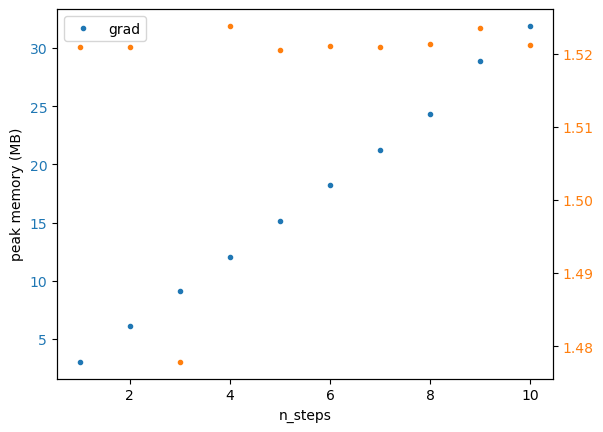

In [16]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(n_slices3, np.array(memory3), '.', color=colors[0], label='grad')
ax.tick_params(axis="y", labelcolor=colors[0])
ax2.plot(n_slices3, np.array(memory3_nograd), '.', color=colors[1], label='no grad')
ax2.tick_params(axis="y", labelcolor=colors[1])
ax.set_xlabel('n_steps')
ax.set_ylabel('peak memory (MB)')
ax.legend()